# Bonus Challenge for OpenCV

Here is a small challenge using OpenCV.

Your task: Create an Andy Warhol-inspired image: 

<img src="images/lessons_files/andy_warhol.webp" width="400"/>

Andy Warhol is an American artist known for his paintings that consist of repeated comic-style images. We have an example of one of his paintings above. Your challenge is to use the OpenCV skills you've learned to emulate one of his paintings using an image of your choice. This challenge works well with images that have flat or empty backgrounds. Your Andy Warhol image should have the following characteristics:

* Contain at least 4 repeated images stacked together in a single image
* Each repeated image should have unique colors
* The colors in the image should be *flattened* in a way to emulate comic-styles. This means that there should be only around 4-6 unique colors in each image patch, and colors should be mapped to one of these colors.

We've split up this challenge into multiple pieces. 

**Useful Resources**:
* Numpy hstack and vstack functions
* https://wamingo.net/rgbbgr/ for finding colors
* https://imagecolorpicker.com/ for picking colors from your image

(np.float64(-0.5), np.float64(3199.5), np.float64(3199.5), np.float64(-0.5))

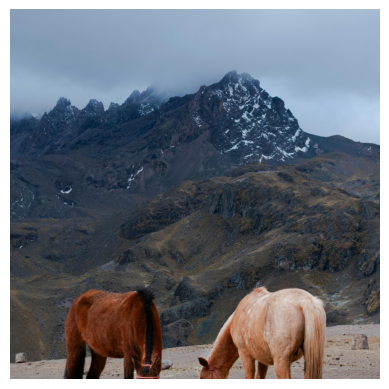

In [1]:
# Part 1: Getting your image ready and building multiple copies

import numpy as np
import cv2
import matplotlib.pyplot as plt

# YOUR CODE HERE

horses_img = cv2.imread("images/horses.jpg")

horses_img = horses_img[:horses_img.shape[1] - horses_img.shape[0]]

plt.imshow(cv2.cvtColor(horses_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [2]:
# Part 2: For each patch, flatten the colors to 4-6 unique colors
import numpy as np

def flatten_img(img: np.ndarray, colors: tuple[np.ndarray]) -> np.ndarray:
    palette = np.vstack(colors)
    diff = img[..., None, :] - palette[None, None, :, :]
    print(diff)
    dist = np.linalg.norm(diff, axis=-1)

    # index of closest color
    idx = np.argmin(dist, axis=-1)
    return palette[idx]


In [3]:
# Part 3: Combine the patches together
import numpy as np


def hex2bgr(hex_str: str) -> np.ndarray:
    hex_str = hex_str.lstrip('#')
    r = int(hex_str[0:2], 16)
    g = int(hex_str[2:4], 16)
    b = int(hex_str[4:6], 16)
    return np.array([b, g, r], dtype=np.uint8)


palettes = ((
    hex2bgr("02394A"),
    hex2bgr("043565"),
    hex2bgr("5158BB"),
    hex2bgr("F26DF9"),
    hex2bgr("EB4B98")
),
(
    hex2bgr("0B132B"),  # deep navy
    hex2bgr("1C2541"),  # muted blue
    hex2bgr("3A506B"),  # steel blue
    hex2bgr("5BC0BE"),  # teal
    hex2bgr("6FFFE9")   # light aqua
),
(
    hex2bgr("2E1F27"),  # dark plum
    hex2bgr("4A1942"),  # wine
    hex2bgr("893168"),  # magenta
    hex2bgr("C4548A"),  # rose
    hex2bgr("F4B6C2")   # soft pink
),
(
    hex2bgr("1B2A41"),  # midnight blue
    hex2bgr("3A4F7A"),  # slate blue
    hex2bgr("5C7AEA"),  # vivid blue
    hex2bgr("9BB1FF"),  # pastel blue
    hex2bgr("EDEBFF")   # near white lavender
),
(
    hex2bgr("2B2D42"),  # charcoal blue
    hex2bgr("4A4E69"),  # gray violet
    hex2bgr("8D99AE"),  # cool gray
    hex2bgr("EDF2F4"),  # off white
    hex2bgr("EF233C")   # accent red
),
(
    hex2bgr("1F3D2B"),  # deep green
    hex2bgr("2D6A4F"),  # forest green
    hex2bgr("52B788"),  # mint green
    hex2bgr("95D5B2"),  # pale green
    hex2bgr("D8F3DC")   # soft mint
)
)

patches = []

for colors in palettes:
    patches.append(flatten_img(horses_img, colors))

[[[[110 103 136]
   [ 83 107 134]
   [253  72  57]
   [191  51 152]
   [ 32  85 159]]

  [[111 104 137]
   [ 84 108 135]
   [254  73  58]
   [192  52 153]
   [ 33  86 160]]

  [[111 104 137]
   [ 84 108 135]
   [254  73  58]
   [192  52 153]
   [ 33  86 160]]

  ...

  [[142 134 169]
   [115 138 167]
   [ 29 103  90]
   [223  82 185]
   [ 64 116 192]]

  [[139 131 166]
   [112 135 164]
   [ 26 100  87]
   [220  79 182]
   [ 61 113 189]]

  [[136 128 163]
   [109 132 161]
   [ 23  97  84]
   [217  76 179]
   [ 58 110 186]]]


 [[[110 103 136]
   [ 83 107 134]
   [253  72  57]
   [191  51 152]
   [ 32  85 159]]

  [[112 105 138]
   [ 85 109 136]
   [255  74  59]
   [193  53 154]
   [ 34  87 161]]

  [[112 105 138]
   [ 85 109 136]
   [255  74  59]
   [193  53 154]
   [ 34  87 161]]

  ...

  [[141 133 168]
   [114 137 166]
   [ 28 102  89]
   [222  81 184]
   [ 63 115 191]]

  [[139 131 166]
   [112 135 164]
   [ 26 100  87]
   [220  79 182]
   [ 61 113 189]]

  [[136 128 163]
   [109 13

(np.float64(-0.5), np.float64(9599.5), np.float64(6399.5), np.float64(-0.5))

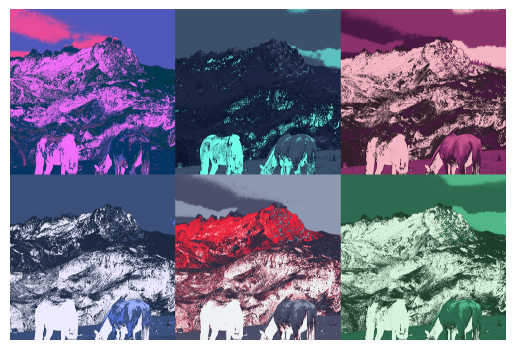

In [4]:
# Part 4: Display your image

full_img = np.vstack((
    np.hstack(
        (patches[0], patches[1], patches[2])
    ),
    np.hstack(
        (patches[3], patches[4], patches[5])
    )
))

plt.imshow(cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB))
plt.axis('off')